# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, Convolution1D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.convolutional import SeparableConvolution2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


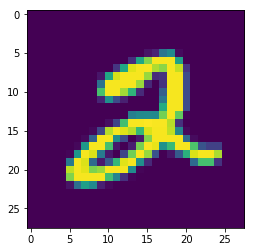

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConvolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConvolution2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16,1,1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2), strides=2))

model.add(SeparableConvolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConvolution2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(SeparableConvolution2D(128, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1,1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())

# model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: 

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_46 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_51 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
separable_conv2d_23 (Separab (None, 24, 24, 32)        688       
_________________________________________________________________
batch_normalization_47 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_52 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
separable_conv2d_24 (Separab (None, 22, 22, 64)        2400      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 56s 928us/step - loss: 0.4427 - acc: 0.9435 - val_loss: 0.1300 - val_acc: 0.9826
Epoch 2/20
60000/60000 [==============================] - 52s 871us/step - loss: 0.1365 - acc: 0.9770 - val_loss: 0.0554 - val_acc: 0.9898
Epoch 3/20
60000/60000 [==============================] - 52s 865us/step - loss: 0.0856 - acc: 0.9830 - val_loss: 0.0623 - val_acc: 0.9861
Epoch 4/20
60000/60000 [==============================] - 51s 851us/step - loss: 0.0678 - acc: 0.9848 - val_loss: 0.0342 - val_acc: 0.9906
Epoch 5/20
60000/60000 [==============================] - 51s 849us/step - loss: 0.0556 - acc: 0.9868 - val_loss: 0.0459 - val_acc: 0.9867
Epoch 6/20
60000/60000 [==============================] - 51s 855us/step - loss: 0.0473 - acc: 0.9881 - val_loss: 0.0345 - val_acc: 0.9897
Epoch 7/20
60000/60000 [==============================] - 52s 859us/step - loss: 0.0424 - acc: 0.9893 - val_loss: 0.

In [26]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 1s 148us/step
[0.019871567127574236, 0.9947]


In [0]:
y_pred = model.predict(X_test)

In [28]:
print(np.argmax(y_pred[:9], axis=1))
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

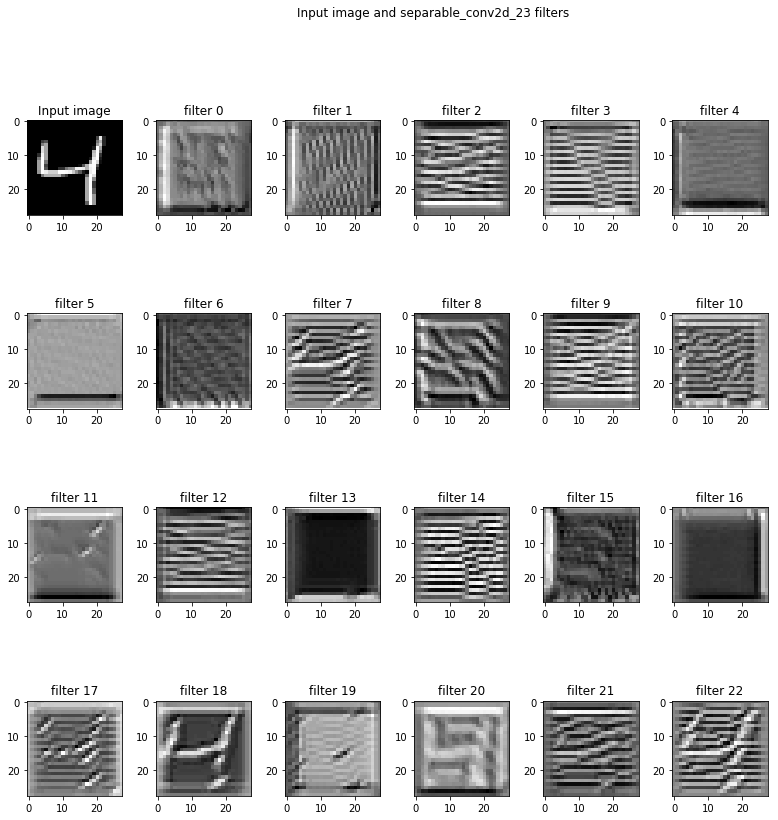

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'separable_conv2d_23'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()